## Gen-I izziv
Grafična analiza proizvodnje-prevzema električne energije. 
Časovno odobje podatkov: 31.5.2019 - 31.5.2020
Frekvenca: 1 ura

Uporabljene Python knjižnice:
* Pandas
* Numpy
* Seaborn

In [477]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [290]:
df = pd.read_csv('/Users/blazkranjcev/Py Scripts/Gen_I/Seznam_1.csv', sep=';')  

In [291]:
df['datum'] = pd.to_datetime(df['datum'])

In [189]:
df

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,2019-01-01,H01,968.0,977.0,1083,1087.0,694.0,246.0,50.0
1,2019-01-01,H02,962.0,1059.0,1036,1050.0,695.0,262.0,115.0
2,2019-01-01,H03,959.0,982.0,997,1008.0,695.0,250.0,49.0
3,2019-01-01,H04,961.0,979.0,972,960.0,694.0,250.0,47.0
4,2019-01-01,H05,870.0,947.0,983,935.0,694.0,218.0,47.0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,H20,1867.0,1811.0,1461,1451.0,697.0,242.0,882.0
8756,2019-12-31,H21,1788.0,1813.0,1405,1359.0,697.0,244.0,882.0
8757,2019-12-31,H22,1620.0,1610.0,1317,1255.0,697.0,244.0,680.0
8758,2019-12-31,H23,1602.0,1503.0,1235,1186.0,697.0,240.0,578.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
datum                     8760 non-null datetime64[ns]
ura                       8760 non-null object
predvidena_proizvodnja    8735 non-null float64
dejanska_proizvodnja      8759 non-null float64
predviden_prevzem         8760 non-null int64
dejanski_prevzem          8759 non-null float64
nek                       8759 non-null float64
termo                     8759 non-null float64
hidro                     8759 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 616.1+ KB


In [192]:
monthly = df.set_index('datum')
# monthly = df.groupby(pd.Grouper(freq='M')).sum()
monthly

,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
datum,,,,,,,,
2019-01-01,H01,968.0,977.0,1083,1087.0,694.0,246.0,50.0
2019-01-01,H02,962.0,1059.0,1036,1050.0,695.0,262.0,115.0
2019-01-01,H03,959.0,982.0,997,1008.0,695.0,250.0,49.0
2019-01-01,H04,961.0,979.0,972,960.0,694.0,250.0,47.0
2019-01-01,H05,870.0,947.0,983,935.0,694.0,218.0,47.0
...,...,...,...,...,...,...,...,...
2019-12-31,H20,1867.0,1811.0,1461,1451.0,697.0,242.0,882.0
2019-12-31,H21,1788.0,1813.0,1405,1359.0,697.0,244.0,882.0
2019-12-31,H22,1620.0,1610.0,1317,1255.0,697.0,244.0,680.0


In [193]:
monthly = monthly.groupby(pd.Grouper(freq='M')).sum()

In [198]:
monthly = monthly.reset_index()

In [457]:
monthly

,datum,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,2019-01-31,1117301.0,1098368.0,1201828,1194558.0,495299.0,370756.0,235561.0
1,2019-02-28,1074484.0,1042201.0,1027813,1016069.0,449201.0,329769.0,269512.0
2,2019-03-31,1127084.0,1083829.0,1120331,1107473.0,498370.0,301491.0,290561.0
3,2019-04-30,1147616.0,1124467.0,1047656,1042842.0,481817.0,270447.0,380635.0
4,2019-05-31,1273269.0,1284865.0,1123318,1119876.0,498064.0,333071.0,460443.0
5,2019-06-30,1242940.0,1232105.0,1076303,1078118.0,477490.0,325003.0,435329.0
6,2019-07-31,1227439.0,1216208.0,1094609,1085899.0,490128.0,414687.0,319092.0
7,2019-08-31,1094119.0,1062983.0,1092483,1087476.0,489290.0,280015.0,298273.0
8,2019-09-30,1131851.0,1109121.0,1067784,1054307.0,473567.0,344220.0,297462.0
9,2019-10-31,904677.0,889040.0,1106549,1093521.0,201268.0,425010.0,275972.0


<Figure size 432x288 with 0 Axes>

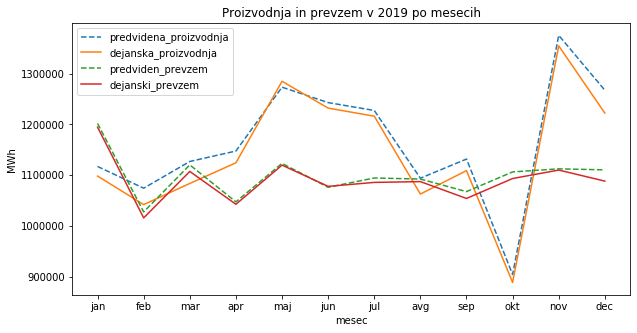

In [466]:
plt.tight_layout()
plt.subplots(figsize=(10,5))

N = 12
ind = np.arange(N)+1

p1 = plt.plot(ind, 'predvidena_proizvodnja', data=monthly, linestyle='dashed')
p2 = plt.plot(ind, 'dejanska_proizvodnja', data=monthly)
p3 = plt.plot(ind, 'predviden_prevzem', data=monthly, linestyle='dashed')
p4 = plt.plot(ind, 'dejanski_prevzem', data=monthly)

plt.title(label='Proizvodnja in prevzem v 2019 po mesecih', fontsize=12)
plt.xlabel('mesec')
plt.ylabel('MWh')
plt.xticks(ind, ('jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'avg', 'sep', 'okt', 'nov', 'dec'))

plt.legend()
plt.show()

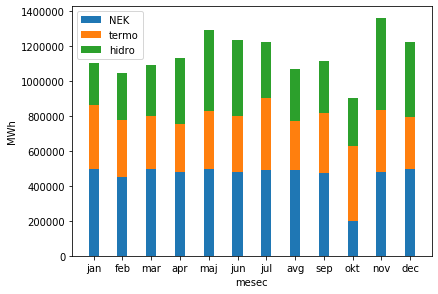

In [468]:
width = 0.35
N=12
ind = np.arange(N)
p1 = plt.bar(ind, monthly.nek, width, data=monthly)
p2 = plt.bar(ind, monthly.termo, width, bottom=monthly.nek, data=monthly)
p3 = plt.bar(ind, monthly.hidro, width, bottom=monthly.nek + monthly.termo, data=monthly)

plt.xticks(ind, ('jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'avg', 'sep', 'okt', 'nov', 'dec'))
plt.legend((p1[0], p2[0], p3[0]), ('NEK', 'termo', 'hidro'))
plt.tight_layout()
plt.xlabel('mesec')
plt.ylabel('MWh')
plt.show()

In [121]:
df.isnull().sum()

ura                        0
predvidena_proizvodnja    25
dejanska_proizvodnja       1
predviden_prevzem          0
dejanski_prevzem           1
nek                        1
termo                      1
hidro                      1
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
datum                     8760 non-null datetime64[ns]
ura                       8760 non-null object
predvidena_proizvodnja    8735 non-null float64
dejanska_proizvodnja      8759 non-null float64
predviden_prevzem         8760 non-null int64
dejanski_prevzem          8759 non-null float64
nek                       8759 non-null float64
termo                     8759 non-null float64
hidro                     8759 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 616.1+ KB


In [131]:
df.set_index('datum', drop=False)

KeyError: "None of ['datum'] are in the columns"

In [160]:
monthly

,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
datum,,,,,,,
2019-01-31,1117301.0,1098368.0,1201828,1194558.0,495299.0,370756.0,235561.0
2019-02-28,1074484.0,1042201.0,1027813,1016069.0,449201.0,329769.0,269512.0
2019-03-31,1127084.0,1083829.0,1120331,1107473.0,498370.0,301491.0,290561.0
2019-04-30,1147616.0,1124467.0,1047656,1042842.0,481817.0,270447.0,380635.0
2019-05-31,1273269.0,1284865.0,1123318,1119876.0,498064.0,333071.0,460443.0
2019-06-30,1242940.0,1232105.0,1076303,1078118.0,477490.0,325003.0,435329.0
2019-07-31,1227439.0,1216208.0,1094609,1085899.0,490128.0,414687.0,319092.0
2019-08-31,1094119.0,1062983.0,1092483,1087476.0,489290.0,280015.0,298273.0
2019-09-30,1131851.0,1109121.0,1067784,1054307.0,473567.0,344220.0,297462.0


In [251]:
null_data = df[df.isnull().any(axis=1)]
null_data

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
2138,2019-03-31,H03,1187.0,1175.0,1072,1097.0,NaN,NaN,NaN
2159,2019-03-31,H24,NaN,NaN,0,NaN,696.0,309.0,156.0
3312,2019-05-19,H01,NaN,1504.0,1144,1133.0,695.0,428.0,386.0
3313,2019-05-19,H02,NaN,1317.0,1080,1058.0,695.0,325.0,302.0
3314,2019-05-19,H03,NaN,1248.0,1069,1029.0,695.0,271.0,287.0
3315,2019-05-19,H04,NaN,1236.0,1057,1009.0,695.0,265.0,281.0
3316,2019-05-19,H05,NaN,1227.0,1057,1011.0,695.0,258.0,278.0
3317,2019-05-19,H06,NaN,1245.0,1057,1012.0,695.0,264.0,290.0
3318,2019-05-19,H07,NaN,1258.0,1090,1055.0,695.0,257.0,311.0
3319,2019-05-19,H08,NaN,1465.0,1179,1172.0,695.0,265.0,511.0


In [292]:
dnevna = df.loc[df['datum'] == '2019-03-15']

In [293]:
dnevna

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
1752,2019-03-15,H01,1262.0,1248.0,1362,1372.0,696.0,444.0,121.0
1753,2019-03-15,H02,1228.0,1212.0,1311,1318.0,696.0,447.0,82.0
1754,2019-03-15,H03,1174.0,1149.0,1295,1287.0,696.0,360.0,107.0
1755,2019-03-15,H04,1159.0,1112.0,1304,1283.0,696.0,330.0,97.0
1756,2019-03-15,H05,1184.0,1150.0,1327,1337.0,696.0,348.0,120.0
1757,2019-03-15,H06,1269.0,1242.0,1434,1466.0,695.0,436.0,120.0
1758,2019-03-15,H07,1395.0,1331.0,1709,1718.0,695.0,451.0,193.0
1759,2019-03-15,H08,1665.0,1634.0,1819,1852.0,696.0,499.0,451.0
1760,2019-03-15,H09,1623.0,1626.0,1811,1808.0,696.0,489.0,455.0
1761,2019-03-15,H10,1638.0,1620.0,1736,1745.0,696.0,486.0,450.0


<Figure size 432x288 with 0 Axes>

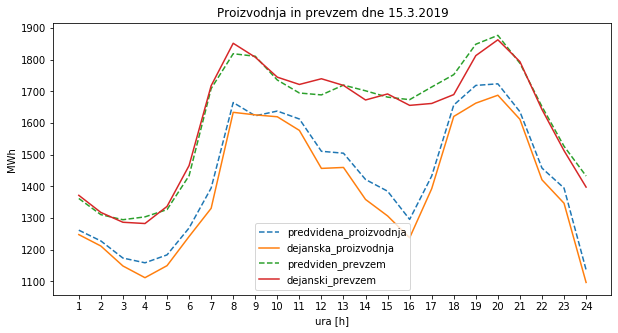

In [476]:
plt.tight_layout()
plt.subplots(figsize=(10,5))

N = 24
ind = np.arange(N)+1

p1 = plt.plot(ind, 'predvidena_proizvodnja', data=dnevna, linestyle='dashed')
p2 = plt.plot(ind, 'dejanska_proizvodnja', data=dnevna)
p3 = plt.plot(ind, 'predviden_prevzem', data=dnevna, linestyle='dashed')
p4 = plt.plot(ind, 'dejanski_prevzem', data=dnevna)

plt.title(label='Proizvodnja in prevzem dne 15.3.2019', fontsize=12)
plt.xlabel('ura [h]')
plt.ylabel('MWh')
plt.xticks(np.arange(min(ind), max(ind)+1, 1.0))

plt.legend()
plt.show()

In [287]:
df['ura'].replace('H', '', regex=True, inplace=True)
df['ura'].replace('0', '', regex=True, inplace=True)
df['ura'] = df['ura'].astype(int)
df

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,2019-01-01,1,968.0,977.0,1083,1087.0,694.0,246.0,50.0
1,2019-01-01,2,962.0,1059.0,1036,1050.0,695.0,262.0,115.0
2,2019-01-01,3,959.0,982.0,997,1008.0,695.0,250.0,49.0
3,2019-01-01,4,961.0,979.0,972,960.0,694.0,250.0,47.0
4,2019-01-01,5,870.0,947.0,983,935.0,694.0,218.0,47.0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,2,1867.0,1811.0,1461,1451.0,697.0,242.0,882.0
8756,2019-12-31,21,1788.0,1813.0,1405,1359.0,697.0,244.0,882.0
8757,2019-12-31,22,1620.0,1610.0,1317,1255.0,697.0,244.0,680.0
8758,2019-12-31,23,1602.0,1503.0,1235,1186.0,697.0,240.0,578.0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
datum                     8760 non-null datetime64[ns]
ura                       8760 non-null int64
predvidena_proizvodnja    8735 non-null float64
dejanska_proizvodnja      8759 non-null float64
predviden_prevzem         8760 non-null int64
dejanski_prevzem          8759 non-null float64
nek                       8759 non-null float64
termo                     8759 non-null float64
hidro                     8759 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 616.1 KB


In [294]:
dnevna = df.loc[df['datum'] == '2019-03-15']
dnevna

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
1752,2019-03-15,H01,1262.0,1248.0,1362,1372.0,696.0,444.0,121.0
1753,2019-03-15,H02,1228.0,1212.0,1311,1318.0,696.0,447.0,82.0
1754,2019-03-15,H03,1174.0,1149.0,1295,1287.0,696.0,360.0,107.0
1755,2019-03-15,H04,1159.0,1112.0,1304,1283.0,696.0,330.0,97.0
1756,2019-03-15,H05,1184.0,1150.0,1327,1337.0,696.0,348.0,120.0
1757,2019-03-15,H06,1269.0,1242.0,1434,1466.0,695.0,436.0,120.0
1758,2019-03-15,H07,1395.0,1331.0,1709,1718.0,695.0,451.0,193.0
1759,2019-03-15,H08,1665.0,1634.0,1819,1852.0,696.0,499.0,451.0
1760,2019-03-15,H09,1623.0,1626.0,1811,1808.0,696.0,489.0,455.0
1761,2019-03-15,H10,1638.0,1620.0,1736,1745.0,696.0,486.0,450.0


In [295]:
df['ura'].replace('H', '', regex=True, inplace=True)

In [296]:
df

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,2019-01-01,01,968.0,977.0,1083,1087.0,694.0,246.0,50.0
1,2019-01-01,02,962.0,1059.0,1036,1050.0,695.0,262.0,115.0
2,2019-01-01,03,959.0,982.0,997,1008.0,695.0,250.0,49.0
3,2019-01-01,04,961.0,979.0,972,960.0,694.0,250.0,47.0
4,2019-01-01,05,870.0,947.0,983,935.0,694.0,218.0,47.0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,20,1867.0,1811.0,1461,1451.0,697.0,242.0,882.0
8756,2019-12-31,21,1788.0,1813.0,1405,1359.0,697.0,244.0,882.0
8757,2019-12-31,22,1620.0,1610.0,1317,1255.0,697.0,244.0,680.0
8758,2019-12-31,23,1602.0,1503.0,1235,1186.0,697.0,240.0,578.0


In [297]:
dnevna = df.loc[df['datum'] == '2019-03-15']
dnevna

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
1752,2019-03-15,01,1262.0,1248.0,1362,1372.0,696.0,444.0,121.0
1753,2019-03-15,02,1228.0,1212.0,1311,1318.0,696.0,447.0,82.0
1754,2019-03-15,03,1174.0,1149.0,1295,1287.0,696.0,360.0,107.0
1755,2019-03-15,04,1159.0,1112.0,1304,1283.0,696.0,330.0,97.0
1756,2019-03-15,05,1184.0,1150.0,1327,1337.0,696.0,348.0,120.0
1757,2019-03-15,06,1269.0,1242.0,1434,1466.0,695.0,436.0,120.0
1758,2019-03-15,07,1395.0,1331.0,1709,1718.0,695.0,451.0,193.0
1759,2019-03-15,08,1665.0,1634.0,1819,1852.0,696.0,499.0,451.0
1760,2019-03-15,09,1623.0,1626.0,1811,1808.0,696.0,489.0,455.0
1761,2019-03-15,10,1638.0,1620.0,1736,1745.0,696.0,486.0,450.0


In [298]:
df['ura'] = df['ura'].astype(int)

In [299]:
df

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,2019-01-01,1,968.0,977.0,1083,1087.0,694.0,246.0,50.0
1,2019-01-01,2,962.0,1059.0,1036,1050.0,695.0,262.0,115.0
2,2019-01-01,3,959.0,982.0,997,1008.0,695.0,250.0,49.0
3,2019-01-01,4,961.0,979.0,972,960.0,694.0,250.0,47.0
4,2019-01-01,5,870.0,947.0,983,935.0,694.0,218.0,47.0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,20,1867.0,1811.0,1461,1451.0,697.0,242.0,882.0
8756,2019-12-31,21,1788.0,1813.0,1405,1359.0,697.0,244.0,882.0
8757,2019-12-31,22,1620.0,1610.0,1317,1255.0,697.0,244.0,680.0
8758,2019-12-31,23,1602.0,1503.0,1235,1186.0,697.0,240.0,578.0


In [301]:
dnevna = df.loc[df['datum'] == '2019-03-15']

In [302]:
dnevna

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
1752,2019-03-15,1,1262.0,1248.0,1362,1372.0,696.0,444.0,121.0
1753,2019-03-15,2,1228.0,1212.0,1311,1318.0,696.0,447.0,82.0
1754,2019-03-15,3,1174.0,1149.0,1295,1287.0,696.0,360.0,107.0
1755,2019-03-15,4,1159.0,1112.0,1304,1283.0,696.0,330.0,97.0
1756,2019-03-15,5,1184.0,1150.0,1327,1337.0,696.0,348.0,120.0
1757,2019-03-15,6,1269.0,1242.0,1434,1466.0,695.0,436.0,120.0
1758,2019-03-15,7,1395.0,1331.0,1709,1718.0,695.0,451.0,193.0
1759,2019-03-15,8,1665.0,1634.0,1819,1852.0,696.0,499.0,451.0
1760,2019-03-15,9,1623.0,1626.0,1811,1808.0,696.0,489.0,455.0
1761,2019-03-15,10,1638.0,1620.0,1736,1745.0,696.0,486.0,450.0


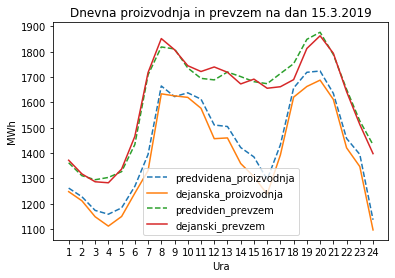

In [319]:
plt.tight_layout()

p1 = plt.plot('ura', 'predvidena_proizvodnja', data=dnevna, linestyle='dashed')
p2 = plt.plot( 'ura', 'dejanska_proizvodnja', data=dnevna)
p3 = plt.plot( 'ura', 'predviden_prevzem', data=dnevna, linestyle='dashed')
p4 = plt.plot( 'ura', 'dejanski_prevzem', data=dnevna)

N = 24
ind = np.arange(N)+1

plt.title(label='Dnevna proizvodnja in prevzem na dan 15.3.2019', fontsize=12)
plt.xlabel('Ura')
plt.ylabel('MWh')

plt.xticks(ticks=ind)
plt.legend()
plt.show()

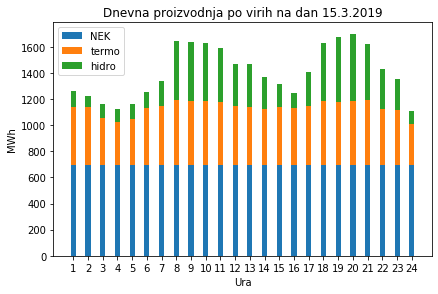

In [321]:
width = 0.35
N=24
ind = np.arange(N)+1 

p1 = plt.bar(ind, dnevna.nek, width, data=dnevna)
p2 = plt.bar(ind, dnevna.termo, width, bottom=dnevna.nek, data=dnevna)
p3 = plt.bar(ind, dnevna.hidro, width, bottom=dnevna.nek + dnevna.termo, data=dnevna)

plt.xticks(ticks=ind)
plt.legend((p1[0], p2[0], p3[0]), ('NEK', 'termo', 'hidro'))
plt.title(label='Dnevna proizvodnja po virih na dan 15.3.2019')
plt.tight_layout()
plt.xlabel('Ura')
plt.ylabel('MWh')
plt.show()

In [322]:
dnevna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1752 to 1775
Data columns (total 9 columns):
datum                     24 non-null datetime64[ns]
ura                       24 non-null int64
predvidena_proizvodnja    24 non-null float64
dejanska_proizvodnja      24 non-null float64
predviden_prevzem         24 non-null int64
dejanski_prevzem          24 non-null float64
nek                       24 non-null float64
termo                     24 non-null float64
hidro                     24 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 2.5 KB


In [396]:
teden = (df['datum'] > '2019-06-16') & (df['datum'] <= '2019-06-23')
teden = df.loc[teden]

In [397]:
teden

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro,dan_v_tednu
4008,2019-06-17,1,1727.0,1694.0,1232,1211.0,684.0,391.0,625.0,0
4009,2019-06-17,2,1608.0,1582.0,1187,1170.0,684.0,307.0,595.0,0
4010,2019-06-17,3,1557.0,1529.0,1146,1104.0,684.0,256.0,594.0,0
4011,2019-06-17,4,1557.0,1530.0,1143,1104.0,684.0,255.0,597.0,0
4012,2019-06-17,5,1557.0,1525.0,1167,1138.0,684.0,251.0,595.0,0
4013,2019-06-17,6,1637.0,1606.0,1251,1258.0,684.0,302.0,625.0,0
4014,2019-06-17,7,1761.0,1749.0,1510,1549.0,684.0,410.0,662.0,0
4015,2019-06-17,8,1927.0,2014.0,1644,1707.0,683.0,503.0,836.0,0
4016,2019-06-17,9,1940.0,1928.0,1681,1743.0,683.0,531.0,725.0,0
4017,2019-06-17,10,1951.0,1933.0,1662,1709.0,683.0,510.0,750.0,0


In [389]:
df['dan_v_tednu'] = df['datum'].dt.dayofweek

In [398]:
teden = teden.groupby(df['datum'].dt.to_period('D')).sum().reset_index()
teden['dan_v_tednu'] = teden['datum'].dt.dayofweek
teden

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro,dan_v_tednu
0,2019-06-17,300,43053.0,43176.0,36920,37582.0,16403.0,10093.0,16885.0,0
1,2019-06-18,300,44420.0,44229.0,38370,38563.0,16418.0,11190.0,16862.0,1
2,2019-06-19,300,42446.0,44356.0,38909,39137.0,16394.0,11763.0,16427.0,2
3,2019-06-20,300,43883.0,43513.0,39206,39355.0,16392.0,11313.0,16031.0,3
4,2019-06-21,300,42569.0,42861.0,38432,38680.0,16387.0,11457.0,15216.0,4
5,2019-06-22,300,42012.0,42658.0,33712,33782.0,16395.0,10585.0,15818.0,5
6,2019-06-23,300,40394.0,42097.0,30505,29960.0,16459.0,7533.0,18224.0,6


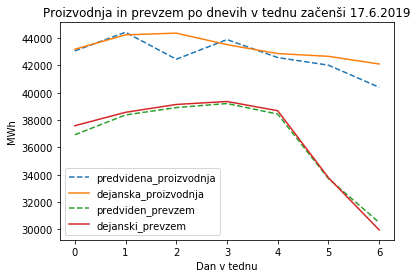

In [400]:
plt.tight_layout()

p1 = plt.plot('dan_v_tednu', 'predvidena_proizvodnja', data=teden, linestyle='dashed')
p2 = plt.plot('dan_v_tednu', 'dejanska_proizvodnja', data=teden)
p3 = plt.plot('dan_v_tednu', 'predviden_prevzem', data=teden, linestyle='dashed')
p4 = plt.plot('dan_v_tednu', 'dejanski_prevzem', data=teden)

# N = 24
# ind = np.arange(N)+1

plt.title(label='Proizvodnja in prevzem po dnevih v tednu začenši 17.6.2019', fontsize=12)
plt.xlabel('Dan v tednu')
plt.ylabel('MWh')

# plt.xticks(ticks=ind)
plt.legend()
plt.show()

In [414]:
seznam_dnevov = ['2019-01-16', '2019-04-17', '2019-07-17', '2019-10-16']
letni_cas = df[df['datum'].isin(seznam_dnevov)]
# letni_cas = df.loc[letni_cas]

In [415]:
letni_cas

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro,dan_v_tednu
360,2019-01-16,1,1301.0,1280.0,1451,1449.0,687.0,574.0,38.0,2
361,2019-01-16,2,1299.0,1287.0,1395,1396.0,688.0,584.0,36.0,2
362,2019-01-16,3,1197.0,1193.0,1369,1373.0,688.0,498.0,36.0,2
363,2019-01-16,4,1195.0,1190.0,1396,1386.0,688.0,496.0,36.0,2
364,2019-01-16,5,1195.0,1165.0,1415,1383.0,688.0,469.0,36.0,2
365,2019-01-16,6,1305.0,1269.0,1550,1459.0,688.0,553.0,54.0,2
366,2019-01-16,7,1479.0,1539.0,1885,1835.0,687.0,618.0,257.0,2
367,2019-01-16,8,1608.0,1700.0,2075,2028.0,687.0,726.0,298.0,2
368,2019-01-16,9,1649.0,1748.0,2099,2049.0,687.0,725.0,350.0,2
369,2019-01-16,10,1652.0,1682.0,2037,1997.0,687.0,716.0,294.0,2


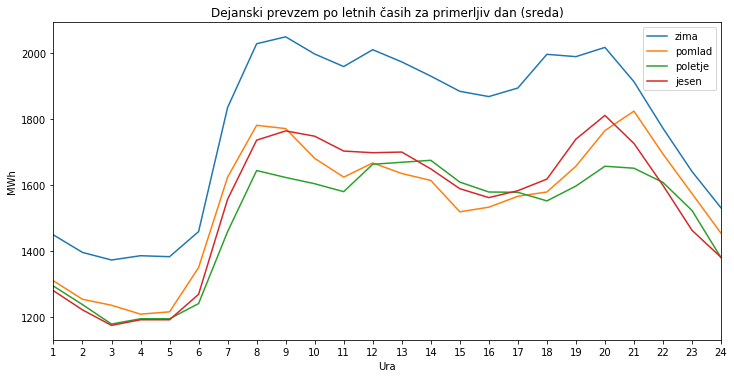

In [436]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tight_layout()
N = 24
ind = np.arange(N)+1

letni_cas.groupby(['ura','datum']).sum()['dejanski_prevzem'].unstack().plot(ax=ax, label=letni_cas_ime)
plt.xlabel('Ura')
plt.ylabel('MWh')
plt.xticks(ticks = ind)
plt.title(label='Dejanski prevzem po letnih časih za primerljiv dan (sreda)')

plt.legend(['zima', 'pomlad', 'poletje', 'jesen'])

plt.show()

In [437]:
teden

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro,dan_v_tednu
0,2019-06-17,300,43053.0,43176.0,36920,37582.0,16403.0,10093.0,16885.0,0
1,2019-06-18,300,44420.0,44229.0,38370,38563.0,16418.0,11190.0,16862.0,1
2,2019-06-19,300,42446.0,44356.0,38909,39137.0,16394.0,11763.0,16427.0,2
3,2019-06-20,300,43883.0,43513.0,39206,39355.0,16392.0,11313.0,16031.0,3
4,2019-06-21,300,42569.0,42861.0,38432,38680.0,16387.0,11457.0,15216.0,4
5,2019-06-22,300,42012.0,42658.0,33712,33782.0,16395.0,10585.0,15818.0,5
6,2019-06-23,300,40394.0,42097.0,30505,29960.0,16459.0,7533.0,18224.0,6


In [438]:
teden_test = (df['datum'] > '2019-06-16') & (df['datum'] <= '2019-06-23')
teden_test = df.loc[teden_test]

In [440]:
teden_test

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro,dan_v_tednu
4008,2019-06-17,1,1727.0,1694.0,1232,1211.0,684.0,391.0,625.0,0
4009,2019-06-17,2,1608.0,1582.0,1187,1170.0,684.0,307.0,595.0,0
4010,2019-06-17,3,1557.0,1529.0,1146,1104.0,684.0,256.0,594.0,0
4011,2019-06-17,4,1557.0,1530.0,1143,1104.0,684.0,255.0,597.0,0
4012,2019-06-17,5,1557.0,1525.0,1167,1138.0,684.0,251.0,595.0,0
4013,2019-06-17,6,1637.0,1606.0,1251,1258.0,684.0,302.0,625.0,0
4014,2019-06-17,7,1761.0,1749.0,1510,1549.0,684.0,410.0,662.0,0
4015,2019-06-17,8,1927.0,2014.0,1644,1707.0,683.0,503.0,836.0,0
4016,2019-06-17,9,1940.0,1928.0,1681,1743.0,683.0,531.0,725.0,0
4017,2019-06-17,10,1951.0,1933.0,1662,1709.0,683.0,510.0,750.0,0


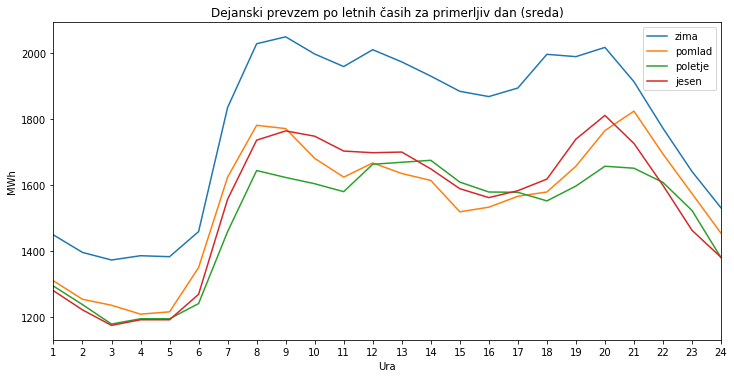

In [444]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tight_layout()
N = 24
ind = np.arange(N)+1

letni_cas.groupby(['ura','datum']).sum()['dejanski_prevzem'].unstack().plot(ax=ax)
plt.xlabel('Ura')
plt.ylabel('MWh')
plt.xticks(ticks = ind)
plt.title(label='Dejanski prevzem po letnih časih za primerljiv dan (sreda)')

plt.legend(['zima', 'pomlad', 'poletje', 'jesen'])

plt.show()

In [448]:
test1 = pd.MultiIndex.from_frame(teden_test)

MultiIndex([('2019-06-17',  1, 1727.0, 1694.0, 1232, 1211.0, 684.0, ...),
            ('2019-06-17',  2, 1608.0, 1582.0, 1187, 1170.0, 684.0, ...),
            ('2019-06-17',  3, 1557.0, 1529.0, 1146, 1104.0, 684.0, ...),
            ('2019-06-17',  4, 1557.0, 1530.0, 1143, 1104.0, 684.0, ...),
            ('2019-06-17',  5, 1557.0, 1525.0, 1167, 1138.0, 684.0, ...),
            ('2019-06-17',  6, 1637.0, 1606.0, 1251, 1258.0, 684.0, ...),
            ('2019-06-17',  7, 1761.0, 1749.0, 1510, 1549.0, 684.0, ...),
            ('2019-06-17',  8, 1927.0, 2014.0, 1644, 1707.0, 683.0, ...),
            ('2019-06-17',  9, 1940.0, 1928.0, 1681, 1743.0, 683.0, ...),
            ('2019-06-17', 10, 1951.0, 1933.0, 1662, 1709.0, 683.0, ...),
            ...
            ('2019-06-23', 15, 1697.0, 1637.0, 1285, 1240.0, 686.0, ...),
            ('2019-06-23', 16, 1759.0, 1688.0, 1263, 1214.0, 686.0, ...),
            ('2019-06-23', 17, 1721.0, 1610.0, 1262, 1203.0, 687.0, ...),
            ('2019-06-

In [450]:
teden_test

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro,dan_v_tednu
4008,2019-06-17,1,1727.0,1694.0,1232,1211.0,684.0,391.0,625.0,0
4009,2019-06-17,2,1608.0,1582.0,1187,1170.0,684.0,307.0,595.0,0
4010,2019-06-17,3,1557.0,1529.0,1146,1104.0,684.0,256.0,594.0,0
4011,2019-06-17,4,1557.0,1530.0,1143,1104.0,684.0,255.0,597.0,0
4012,2019-06-17,5,1557.0,1525.0,1167,1138.0,684.0,251.0,595.0,0
4013,2019-06-17,6,1637.0,1606.0,1251,1258.0,684.0,302.0,625.0,0
4014,2019-06-17,7,1761.0,1749.0,1510,1549.0,684.0,410.0,662.0,0
4015,2019-06-17,8,1927.0,2014.0,1644,1707.0,683.0,503.0,836.0,0
4016,2019-06-17,9,1940.0,1928.0,1681,1743.0,683.0,531.0,725.0,0
4017,2019-06-17,10,1951.0,1933.0,1662,1709.0,683.0,510.0,750.0,0


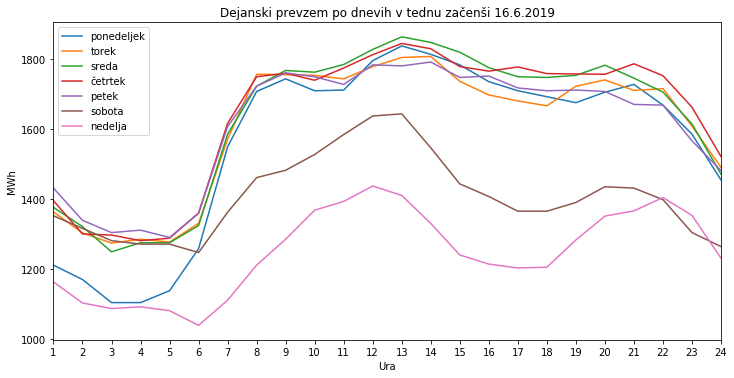

In [456]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tight_layout()
N = 24
ind = np.arange(N)+1

teden_test.groupby(['ura','datum']).sum()['dejanski_prevzem'].unstack().plot(ax=ax)
plt.xlabel('Ura')
plt.ylabel('MWh')
plt.xticks(ticks = ind)
plt.title(label='Dejanski prevzem po dnevih v tednu začenši 16.6.2019')

plt.legend(['ponedeljek', 'torek', 'sreda', 'četrtek', 'petek', 'sobota', 'nedelja'])

plt.show()